# APMA 4903 - Lorenz Attractor Demonstration

In [5]:
import math, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import matplotlib.colors as colors
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

plt.style.use('seaborn-darkgrid')

## The Lorenz Equations
Lorenz equations can be written as the following differential equations:
\begin{equation}
    \frac{dx}{dt} = -\sigma x + \sigma y,
\end{equation}
\begin{equation}
    \frac{dy}{dt} = \rho x - y - xz,
\end{equation}
\begin{equation}
    \frac{dz}{dt} = -\beta z + xy,
\end{equation}

where $\sigma$, $\rho$ and $\beta$ are constants. 

The constant $\sigma$ is called the "Prandtl number" and is a description of the physical characteristics of the system, such as viscosity and thermal conductivity when there is convection. The constant $\rho$ represents a control parameter, which is the difference between the extreme driving forces in the system. Lastly, $\beta$ represents a value that describes the shape of the region where the Lorenz attractor is contained.

In [6]:
def dx(x, y, z, t):
    return (sigma*(y - x))

def dy(x, y, z, t):
    return (rho*x - y - x*z)

def dz(x, y, z, t):
    return (-beta*z + x*y)

In [7]:
# Plotting functions (2D and 3D)
def lorenz_ode_plot_components (x, y, z, axes=None, title=None, **kwargs):
    ax1 = axes
    ax1.plot( t, x, color = plt.get_cmap('plasma')(0.25) ) 
    ax1.plot( t, y, color = plt.get_cmap('plasma')(0.75) )
    ax1.plot( t, z, color = plt.get_cmap('plasma')(0.5) )
    ax1.set_xlabel('t')
    if title == None:
        ax1.set_title(r"$x_0$ = {}, $y_0$ = {}, $z_0$ = {}".format(x[0], y[0], z[0]))
    else:
        ax1.set_title(title)
    ax1.legend(['x','y','z'], loc = 2, frameon = True, facecolor="white")
    plt.tight_layout()
    return ax1

def lorenz_ode_plot_3d (x, y, z):
    fig = plt.figure(figsize = (6,6))
    ax1 = plt.axes(projection='3d')
    ax1.plot (x, y, z, linewidth = 0.5, color = plt.get_cmap('plasma')(0.5))
    #ax.grid ( True )
    ax1.set_xlabel(r'$x(t)$')
    ax1.set_ylabel(r'$y(t)$')
    ax1.set_zlabel(r'$z(t)$')
    ax1.set_title(r"$x_0$ = {}, $y_0$ = {}, $z_0$ = {}".format(x[0], y[0], z[0]))
    plt.tight_layout()
    plt.show()
    return

## Fourth-order Runge-Kutta (RK4) Implementation

In [8]:
def RungeKutta4(dx,dy,dz, inits, n = 3500, T = 50):
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    t = np.zeros(n+1)
    
    x[0] = inits[0]
    y[0] = inits[1]
    z[0] = inits[2]
    t[0] = 0
    dt = T/float(n)
    
    for k in range (n):
    
        t[k+1] = t[k] + dt
        
        k1 = dx(x[k], y[k], z[k], t[k])
        l1 = dy(x[k], y[k], z[k], t[k])
        m1 = dz(x[k], y[k], z[k], t[k])

        k2 = dx((x[k] + k1*dt/2), (y[k] + l1*dt/2), (z[k] + m1*dt/2), (t[k] + dt/2))
        l2 = dy((x[k] + k1*dt/2), (y[k] + l1*dt/2), (z[k] + m1*dt/2), (t[k] + dt/2))
        m2 = dz((x[k] + k1*dt/2), (y[k] + l1*dt/2), (z[k] + m1*dt/2), (t[k] + dt/2))

        k3 = dx((x[k] + k2*dt/2), (y[k] + l2*dt/2), (z[k] + m2*dt/2), (t[k] + dt/2))
        l3 = dy((x[k] + k2*dt/2), (y[k] + l2*dt/2), (z[k] + m2*dt/2), (t[k] + dt/2))
        m3 = dz((x[k] + k2*dt/2), (y[k] + l2*dt/2), (z[k] + m2*dt/2), (t[k] + dt/2))

        k4 = dx((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        l4 = dy((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        m4 = dz((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))

        x[k+1] = x[k] + (dt*(k1 + 2*(k2 + k3) + k4) / 6)
        y[k+1] = y[k] + (dt*(l1 + 2*(l2 + l3) + l4) / 6)
        z[k+1] = z[k] + (dt*(m1 + 2*(m2 + m3) + m4) / 6)

    return x, y, z, t


## Visualization of Solutions

In [9]:
sigma = 10.0
beta = 8.0/3.0
rho = 28.0

x1, y1, z1, t = RungeKutta4(dx,dy,dz, inits=[1,1,1])
x2, y2, z2, t2 = RungeKutta4(dx,dy,dz, inits=[1,1,1.01])

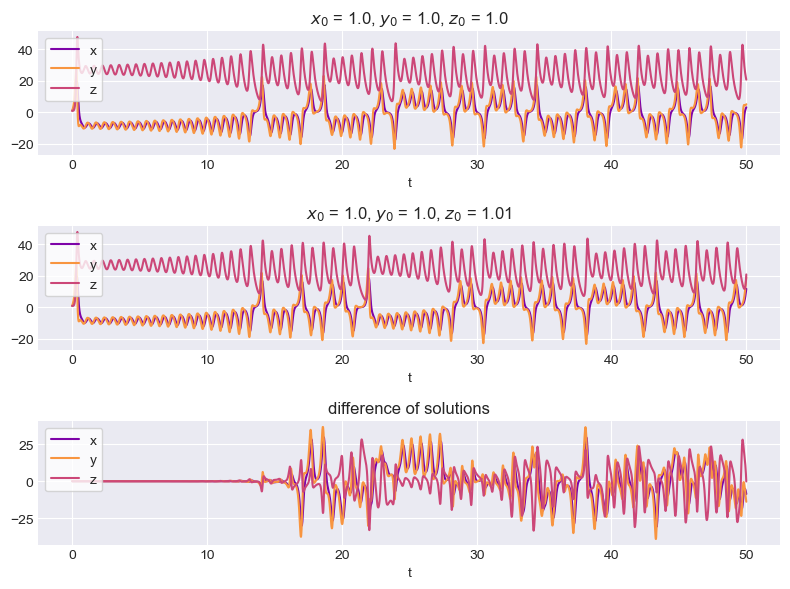

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,6))
lorenz_ode_plot_components(x1,y1,z1,ax1)
lorenz_ode_plot_components(x2,y2,z2,ax2)
lorenz_ode_plot_components(x1-x2,y1-y2,z1-z2,ax3,title="difference of solutions")
plt.show()

In [13]:
#lorenz_ode_plot_3d(x2,y2,z2)

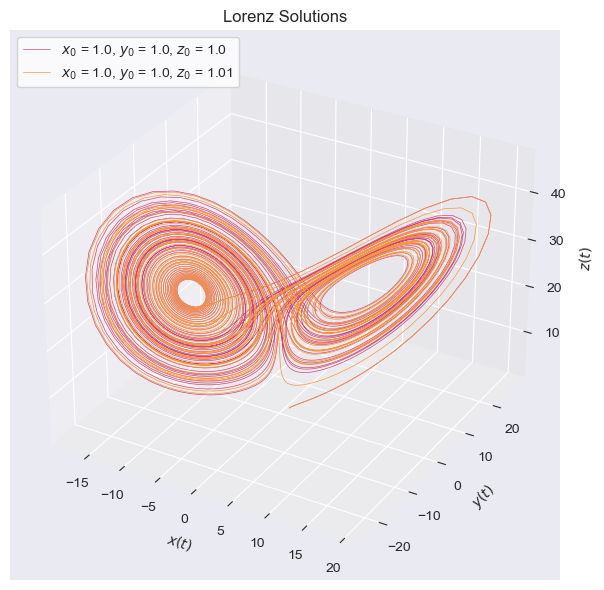

In [14]:
fig = plt.figure(figsize = (6,6))
ax1 = plt.axes(projection='3d')
ax1.plot (x1, y1, z1, linewidth = 0.5, color = plt.get_cmap('plasma')(0.5))
ax1.plot (x2, y2, z2, linewidth = 0.5, color = plt.get_cmap('plasma')(0.75))
ax1.set_xlabel(r'$x(t)$')
ax1.set_ylabel(r'$y(t)$')
ax1.set_zlabel(r'$z(t)$')
ax1.set_title("Lorenz Solutions")
ax1.legend([r"$x_0$ = {}, $y_0$ = {}, $z_0$ = {}".format(x1[0], y1[0], z1[0]), \
            r"$x_0$ = {}, $y_0$ = {}, $z_0$ = {}".format(x2[0], y2[0], z2[0])], loc = 2, frameon = True, facecolor="white")
#plt.savefig ( 'lorenz_ode_3d.png' )
plt.tight_layout()
plt.show()

## Basic RK4 Demonstration

In [23]:
def f(t, u):
    return u

def runge_kutta(f, t_0, u_0, h):
    k_0 = f(t_0, u_0)
    k_1 = f(t_0 + h/2, u_0 + h/2 * k_0)
    k_2 = f(t_0 + h/2, u_0 + h/2 * k_1)
    k_3 = f(t_0 + h, u_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    t_1 = t_0 + h
    u_1 = u_0 + h * k

    return t_1, u_1

In [24]:
t_0 = 0.0
u_0 = 1.0
h = 0.1

t_values = [t_0]
u_values = [u_0]

t = t_0
u = u_0
for _ in range(30):
    t, u = runge_kutta(f, t, u, h)
    t_values.append(t)
    u_values.append(u)

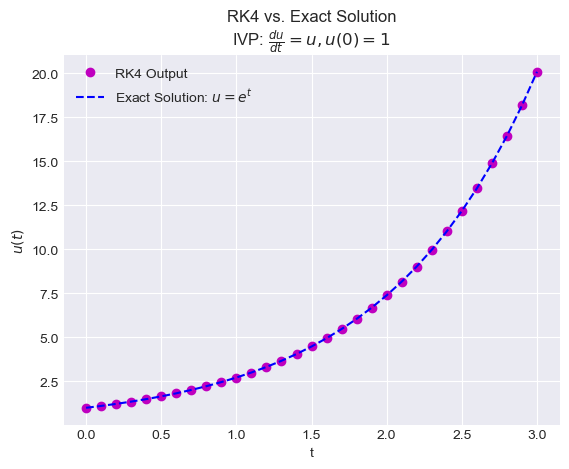

In [25]:
plt.plot(t_values, u_values, 'mo', label="RK4 Output")
plt.plot(t_values, np.exp(t_values), 'b--', label="Exact Solution: $u=e^t$")
plt.xlabel('t')
plt.ylabel('$u(t)$')
plt.title("RK4 vs. Exact Solution\n"+r"IVP: $\frac{du}{dt}=u, u(0)=1$")
plt.legend()
plt.show()

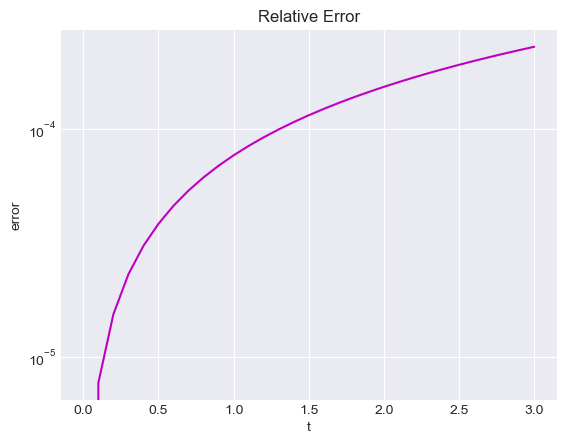

In [26]:
plt.plot(t_values, (np.exp(t_values)-u_values)/np.exp(t_values)*100, color='m')
plt.xlabel('t')
plt.ylabel('error')
plt.yscale('log',base=10) 
plt.title("Relative Error")
plt.show()